In [2]:
# Set-up statements that we will nearly always use
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

# A very quick look at some real data

In [31]:
ecoli = pd.read_csv('~/Dropbox/Transfer/Teaching/DATA201/Datasets/TaranakiStWharf.csv',skiprows=0,header=None,parse_dates=[8])
ecoli.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Wellington region,Wellington Harbour at Taranaki St Dive Platform,Beach,GW-10079,-41.289842,174.780547,Enterococci,0,2016-05-12 09:15:00,20,Green,"LAWA Partners shall not be liable, whether in ..."
1,Wellington region,Wellington Harbour at Taranaki St Dive Platform,Beach,GW-10079,-41.289842,174.780547,Enterococci,0,2016-12-12 07:12:00,16,Green,"LAWA Partners shall not be liable, whether in ..."
2,Wellington region,Wellington Harbour at Taranaki St Dive Platform,Beach,GW-10079,-41.289842,174.780547,Enterococci,0,2016-12-19 08:45:00,12,Green,"LAWA Partners shall not be liable, whether in ..."
3,Wellington region,Wellington Harbour at Taranaki St Dive Platform,Beach,GW-10079,-41.289842,174.780547,Enterococci,0,2016-12-26 08:06:00,4,Green,"LAWA Partners shall not be liable, whether in ..."
4,Wellington region,Wellington Harbour at Taranaki St Dive Platform,Beach,GW-10079,-41.289842,174.780547,Enterococci,0,2017-02-01 09:16:00,28,Green,"LAWA Partners shall not be liable, whether in ..."


How do we plot the ecoli data?

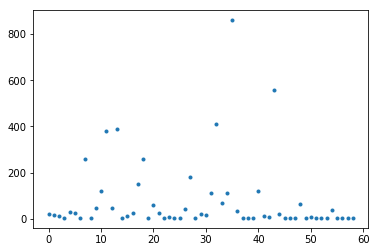

In [58]:
pl.plot(ecoli.iloc[:,9],'.')

It would be more useful with a better $x$ axis

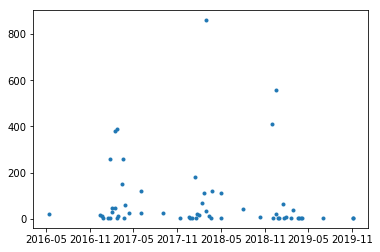

In [59]:
pl.plot(ecoli.iloc[:,8],ecoli.iloc[:,9],'.')

There are colours associated with these, to say if you can swim -- red if ecoli > 350, amber if it is > 150, green otherwise

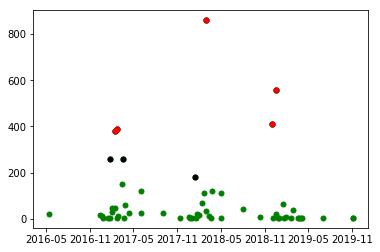

In [46]:
inds_red = np.squeeze(np.where(ecoli.iloc[:,9]>350))
inds_amber = np.squeeze(np.where(ecoli.iloc[:,9]>150))
pl.plot(ecoli.iloc[:,8],ecoli.iloc[:,9],'.g',markersize=10)
pl.plot(ecoli.iloc[inds_amber,8],ecoli.iloc[inds_amber,9],'.k',markersize=10)
pl.plot(ecoli.iloc[inds_red,8],ecoli.iloc[inds_red,9],'.r',markersize=10)

And if you think some of those numbers are bad...
https://www.lawa.org.nz/explore-data/wellington-region/coastal/wellington-harbour-at-taranaki-st-dive-platform/

# In case that was too cheery

In [47]:
co2 = pd.read_csv('~/Dropbox/Transfer/Teaching/DATA201/Datasets/MLO/mlo_station/daily_flask_co2_mlo.csv',skiprows=70,header=None,parse_dates=[0])

This is the CO2 (in ppm) at Mauna Loa on Hawaii for the 60 or so years. Let's plot it.

In [1]:
pl.plot(co2.iloc[500:,0],co2.iloc[500:,-1])

NameError: name 'pl' is not defined

Does it match the NZ data? We should plot them both.

In [51]:
co2nz = pd.read_csv('~/Dropbox/Transfer/Teaching/DATA201/Datasets/daily_flask_co2_nzd.csv',skiprows=70,header=None,parse_dates=[0])

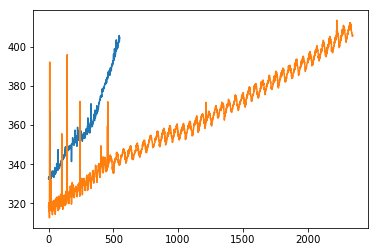

In [52]:
pl.plot(co2nz.iloc[:,-1])
pl.plot(co2.iloc[:,-1])

Why don't they match?

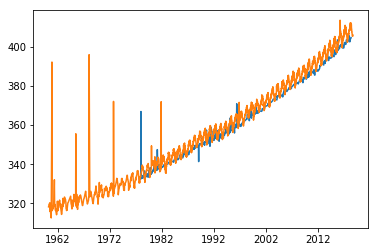

In [53]:
pl.plot(co2nz.iloc[:,0],co2nz.iloc[:,-1])
pl.plot(co2.iloc[:,0],co2.iloc[:,-1])

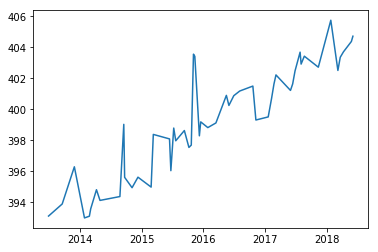

In [56]:
pl.plot(co2nz.iloc[500:,0],co2nz.iloc[500:,-1])

# Image and Sound Data

Inside a computer all data is numbers.

## Images...
record the intensity of light at each point on the microchip in the camera lens. This can be 1D (greyscale), 3D (e.g., red, green, blue), or multi-spectral (lots of other features such as infra-red spectrum, etc.)

We can load and process images using Python.

In [4]:
c = pl.imread('/home/marslast/Dropbox/Transfer/Teaching/DATA201/Labs/cute.jpg')
print(c)
print(np.shape(c))

[[ 2  2  2 ...  8  7  6]
 [ 2  2  2 ...  7  7  7]
 [ 2  2  2 ...  7  7  7]
 ...
 [ 4  4  4 ... 16 18 41]
 [ 3  3  3 ... 17 20 26]
 [ 2  2  2 ... 18 24 22]]
(429, 600)


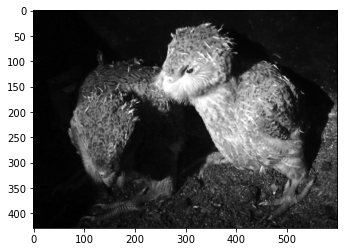

In [7]:
pl.imshow(c,cmap='gray')

[[[ 5  5  7]
  [ 6  6  8]
  [ 5  5  7]
  ...
  [31 38 30]
  [21 28 21]
  [11 18 11]]

 [[ 5  5  7]
  [ 6  6  8]
  [ 6  6  8]
  ...
  [29 36 28]
  [20 27 20]
  [12 19 12]]

 [[ 4  4  6]
  [ 7  7  9]
  [ 7  7  9]
  ...
  [24 31 23]
  [17 24 17]
  [12 19 12]]

 ...

 [[ 5  5  7]
  [ 4  4  6]
  [ 4  4  6]
  ...
  [12 12 12]
  [12 12 12]
  [16 16 16]]

 [[ 5  5  7]
  [ 5  5  7]
  [ 4  4  6]
  ...
  [14 14 14]
  [17 17 17]
  [22 22 22]]

 [[ 6  6  8]
  [ 6  6  8]
  [ 5  5  7]
  ...
  [16 16 16]
  [20 20 20]
  [27 27 27]]]
(475, 400, 3)


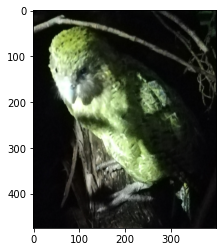

In [10]:
d = pl.imread('hakatere.jpg')
print(d)
print(np.shape(d))
pl.imshow(d,cmap='gray')

## Sound
is a wave of sound pressure. We turn it into a computational representation by sampling the wave at regular time points, such as 36,000 times a second (36 kHz). 

In [14]:
import wavio
s = wavio.read('tril1.wav')

[[ -16   -8   10  -17   -8   26  -57  -47  -46   71   22   11   25  -11
    39   11   40  -43    8   10   61   -5    6    9  -60  -41  -20  -45
   -10   29   40    4  -33  -63   38  -22   -4   -2  -34   50  -63   19
    16   -8  -45  -22    7  -44    8  -25  -17   42   59   24   45   71
    40   -7    6    8  -24   38    6  -13   60   18   33   17  -46  -48
   -39   25  -16  -26   13  -18   -7   24   -7  -77    7    0  -14  -22
   -29   42  -46  -55  -16  -74  -47   29  -35  -26  -55  -16   -5 -137
    -1  -62]]


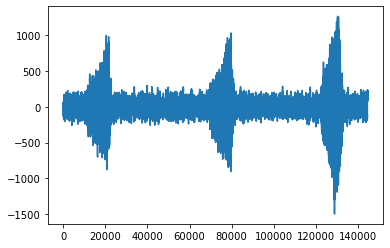

In [22]:
print(s.data[:100].T)
pl.plot(s.data)

We can turn sound into a histogram of power (a spectrogram) using the Fourier transform. This can be treated like an image.

(array([[2.27591838e+05, 6.93586805e+04, 4.32589183e+05, ...,
         9.93355656e+04, 8.71621178e+04, 5.33464293e+05],
        [2.59327427e+05, 3.36184182e+05, 2.52345785e+05, ...,
         2.85938768e+05, 1.25468603e+04, 6.06674932e+05],
        [3.35406695e+04, 6.02677261e+04, 4.13482492e+04, ...,
         8.44245470e+04, 4.72236492e+04, 7.69292162e+04],
        ...,
        [3.43050600e+02, 3.09876860e+01, 3.16686802e+02, ...,
         1.29404488e+03, 6.59398973e+02, 7.11619006e+02],
        [6.32181921e+02, 1.56029291e+02, 2.82908624e+01, ...,
         6.79121720e+02, 5.35030445e+01, 6.09447671e+02],
        [5.60054649e+02, 9.49720531e+01, 5.73251770e+00, ...,
         4.37687927e+01, 1.19246887e+01, 3.28556330e+01]]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.1484375, 0.15625  , 0.

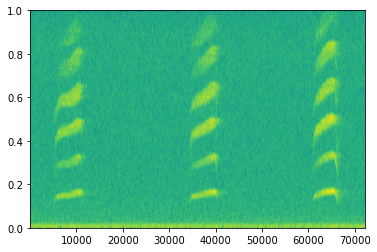

In [23]:
pl.specgram(np.squeeze(s.data))

# Anscombe's dataset

This has two purposes here:
 - to explore a dataset and see how important plotting can be
 - to see some basic NumPy syntax 

In [3]:
data = np.array([
[10.0    ,8.04   ,10.0   ,9.14   ,10.0   ,7.46   ,8.0    ,6.58 ],
[8.0     ,6.95   ,8.0    ,8.14   ,8.0    ,6.77   ,8.0    ,5.76 ],
[13.0    ,7.58   ,13.0   ,8.74   ,13.0   ,12.74  ,8.0    ,7.71 ],
[9.0     ,8.81   ,9.0    ,8.77   ,9.0    ,7.11   ,8.0    ,8.84 ],
[11.0    ,8.33   ,11.0   ,9.26   ,11.0   ,7.81   ,8.0    ,8.47 ],
[14.0    ,9.96   ,14.0   ,8.10   ,14.0   ,8.84   ,8.0    ,7.04 ],
[6.0     ,7.24   ,6.0    ,6.13   ,6.0    ,6.08   ,8.0    ,5.25 ],
[4.0     ,4.26   ,4.0    ,3.10   ,4.0    ,5.39   ,19.0   ,12.50],
[12.0    ,10.84  ,12.0   ,9.13   ,12.0   ,8.15   ,8.0    ,5.56 ],
[7.0     ,4.82   ,7.0    ,7.26   ,7.0    ,6.42   ,8.0    ,7.91 ],
[5.0     ,5.68   ,5.0    ,4.74   ,5.0    ,5.73   ,8.0    ,6.89 ],
])

What are the basic statistics of these datasets?

In [19]:
print(np.mean(data,axis=0))
print(np.std(data,axis=0))

[9.         7.50090909 9.         7.50090909 9.         7.5
 9.         7.50090909]
[3.16227766 1.93702422 3.16227766 1.93710869 3.16227766 1.93593294
 3.16227766 1.93608065]


In [18]:
print(np.corrcoef(data[:,0],data[:,1]))
print(np.corrcoef(data[:,2],data[:,3]))
print(np.corrcoef(data[:,4],data[:,5]))
print(np.corrcoef(data[:,6],data[:,7]))

[[1.         0.81642052]
 [0.81642052 1.        ]]
[[1.         0.81623651]
 [0.81623651 1.        ]]
[[1.         0.81628674]
 [0.81628674 1.        ]]
[[1.         0.81652144]
 [0.81652144 1.        ]]


In [2]:
print(np.polyfit(data[:,0],data[:,1],1))
print(np.polyfit(data[:,2],data[:,3],1))
print(np.polyfit(data[:,4],data[:,5],1))
print(np.polyfit(data[:,6],data[:,7],1))

NameError: name 'np' is not defined

So are they all the same then?

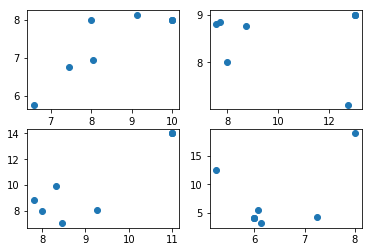

In [28]:
pl.subplot(221)
pl.plot(data[0,:],data[1,:],'.',markersize=12)
pl.subplot(222)
pl.plot(data[2,:],data[3,:],'.',markersize=12)
pl.subplot(223)
pl.plot(data[4,:],data[5,:],'.',markersize=12)
pl.subplot(224)
pl.plot(data[6,:],data[7,:],'.',markersize=12)

In [1]:
print(np.polyfit(data[:,0],data[:,1],1))
print(np.polyfit(data[:,2],data[:,3],1))
print(np.polyfit(data[:,4],data[:,5],1))
print(np.polyfit(data[:,6],data[:,7],1))

NameError: name 'np' is not defined